In [1]:
import sys
sys.path.append('../')
import os
os.environ['DATABASE_URL'] = DATABASE_URL = 'sqlite:////Users/nickhilton/kaggle/march_madness/databases/turtle.db'
DATABASE = os.environ['DATABASE_URL'].split('sqlite:///')[1]

import pandas as pd
from sqlalchemy import *
from sqlalchemy.orm import *
from sqlalchemy.orm import sessionmaker
from models import Match
from models import Team
from models import MatchPredictions
import matplotlib.pyplot as plt

In [2]:
engine = create_engine(DATABASE_URL)
Session = sessionmaker(bind=engine)

session = Session()

In [3]:
session.query(Team).first()

In [4]:
s = session.query(MatchPredictions).filter(MatchPredictions.season == 2010)

In [5]:
matches = session.query(Match).filter(Match.Season == 2011).all()

teams = []

for match in matches:
    teams.extend(match.teams)

teams = list(set(teams))
team_ids = [team.TeamID for team in teams]

In [8]:
matches = session.query(Match.mdid, Match.Season, Match.WScore, Match.LScore, 
              Match.stage, Match.WLoc, Match.NumOT).filter(Match.Season >= 2003).all()

df = pd.DataFrame(matches)

df['delta'] = df.WScore - df.LScore

df.loc[df['NumOT'] > 0, 'delta'] = 0

In [9]:
def calculate_distribution(results):
    delta_counts = results.groupby(by='delta').mdid.count()
    total = delta_counts.sum()
    densityf = delta_counts/total
    cumdf = densityf.cumsum()
    return cumdf

In [10]:
neutrals = (df.loc[df['WLoc'] == 'N',['delta','mdid']]).append(-df.loc[df['WLoc'] == 'N',['delta','mdid']])

homes = (df.loc[df['WLoc'] == 'H',['delta','mdid']]).append(-df.loc[df['WLoc'] == 'A',['delta','mdid']])

aways = -homes

/var/folders/51/f34q3vy907ggv81__1wckfyc0000gn/T/ipykernel_11185/1064317663.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neutrals = (df.loc[df['WLoc'] == 'N',['delta','mdid']]).append(-df.loc[df['WLoc'] == 'N',['delta','mdid']])
/var/folders/51/f34q3vy907ggv81__1wckfyc0000gn/T/ipykernel_11185/1064317663.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  homes = (df.loc[df['WLoc'] == 'H',['delta','mdid']]).append(-df.loc[df['WLoc'] == 'A',['delta','mdid']])


/var/folders/51/f34q3vy907ggv81__1wckfyc0000gn/T/ipykernel_11185/1539519251.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b='on')


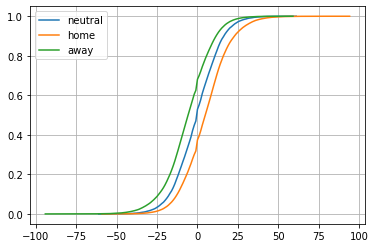

In [11]:
plt.plot(calculate_distribution(neutrals), label = 'neutral')
plt.plot(calculate_distribution(homes), label = 'home')
plt.plot(calculate_distribution(aways), label = 'away')
plt.grid(b='on')
plt.legend()

In [13]:
dist = calculate_distribution(homes)

In [14]:
def response_function(result, distribution):
    if result < distribution.index[0]:
        raise Exception
    if result in distribution:
        return distribution[result]
    else:
        return response_function(result-1, distribution)

In [15]:
fields = []

In [17]:
metrics = session.query(Match).options(load_only(*fields)).filter(Match.Season >= 2003).all()

In [18]:
m = session.query(Match).filter(Match.Season > 2010).first()

In [ ]:
dir(m)

In [ ]:
m.__getattribute__('id')

In [ ]:
dir(m)